## Compute Spearman Correlation between submissions

In [26]:
import pandas as pd
from scipy.stats import spearmanr

# Load the two CSV files

# PLOT for cox and rsf 
file1_path = "./submission_meta(cox_rsf)_xgboost_2025-03-18_01-46_ensemble.csv"     # XGBOOST 1
file2_path = "./submission_2025-03-14_23-48_rsf.csv"
file3_path = "./submitted/submission_2025-03-07_20-34_cox.csv"
file4_path = "./submission_meta(cox_rsf)_xgboost_2025-03-18_11-35_ensemble.csv"

# file3_path = "./submission_2025-03-12_23-11_deepsurv.csv"
# file4_path = "./submission_2025-03-13_13-11_meta_learner_linear_ok.csv"



df_meta = pd.read_csv(file1_path, index_col=0)  # Assuming first column is ID
df_rsf = pd.read_csv(file2_path, index_col=0)  # Assuming first column is ID

# df_deepsurv = pd.read_csv(file3_path, index_col=0)  # Assuming first column is ID

df_cox = pd.read_csv(file3_path, index_col=0)  # Assuming first column is ID
df_linear = pd.read_csv(file4_path, index_col=0)  # Assuming first column is ID

spearman_corr, p_value = spearmanr(df_meta['risk_score'], df_rsf['risk_score'])
print(f"Spearman correlation between meta and rsf: {spearman_corr}")

# Ensure they are aligned by index (ID)
df_merged = df_cox.join(df_rsf, lsuffix='_cox', rsuffix='_rsf')
# df_merged = df_cox.join(df_rsf, lsuffix='_cox', rsuffix='_rsf')

df_merged = df_merged.join(df_meta, rsuffix='_metaaa')
df_merged = df_merged.join(df_linear, rsuffix='_linear')
print(df_merged.head())

# Compute Spearman correlation
spearman_corr1, p_value = spearmanr(df_merged['risk_score_cox'], df_merged['risk_score_rsf'])
spearman_corr2, p_value = spearmanr(df_merged['risk_score_cox'], df_merged['risk_score'])
spearman_corr3, p_value = spearmanr(df_merged['risk_score_rsf'], df_merged['risk_score'])

# spearman_corr , p_value = spearmanr(df_merged['risk_score_meta'], df_merged['risk_score_rsf'])
# spearman_corr1 

print(f"Spearman correlation between cox and rsf: {spearman_corr1}")
print(f"Spearman correlation between cox and meta: {spearman_corr2}")
print(f"Spearman correlation between rsf and meta: {spearman_corr3}")


Spearman correlation between meta and rsf: 0.8409423655622063
      risk_score_cox  risk_score_rsf  risk_score  risk_score_linear
ID                                                                 
KYW1        1.400462      603.723597    1.071363         803.067531
KYW2        0.532592      575.812182    1.058427         741.782381
KYW3       -0.194940      369.071512    1.050218         431.621885
KYW4        1.009014      679.911632    1.070260         839.679290
KYW5        0.237067      576.428874    1.052544         736.489614
Spearman correlation between cox and rsf: 0.8710468687330826
Spearman correlation between cox and meta: 0.9429655995818805
Spearman correlation between rsf and meta: 0.8409423655622063


In [18]:
# file2_path = "./submission_2025-03-13_10-46_meta_learner.csv"
# file1_path = "./submission_2025-03-11_19-17_rsf.csv"

In [27]:
# Z normalize bothb distributions
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rsf_dist = df_rsf['risk_score'].values.reshape(-1, 1)
cox_dist = df_cox['risk_score'].values.reshape(-1, 1)
meta_dist = df_meta['risk_score'].values.reshape(-1, 1)
linear_dist = df_linear['risk_score'].values.reshape(-1, 1)

df_cox['risk_score_z'] = scaler.fit_transform(cox_dist)
df_rsf['risk_score_z'] = scaler.fit_transform(rsf_dist)
df_meta['risk_score_z'] = scaler.fit_transform(meta_dist)
df_linear['risk_score_z'] = scaler.fit_transform(linear_dist)

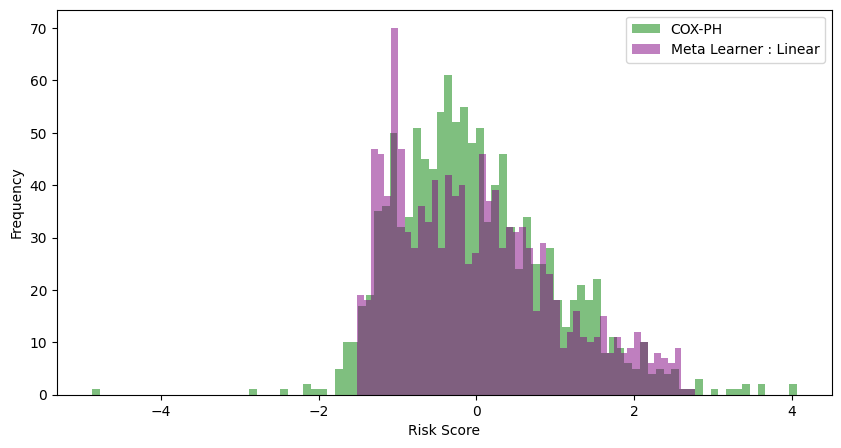

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
# plt.hist(df_rsf["risk_score_z"], bins=50, alpha=0.5, label="RSF", color="blue")
plt.hist(df_cox["risk_score_z"], bins=90, alpha=0.5, label="COX-PH", color="green")
# plt.hist(df_meta["risk_score_z"], bins=50, alpha=0.5, label="Meta Learner : XGBoost", color="red")
plt.hist(df_linear["risk_score_z"], bins=50, alpha=0.5, label="Meta Learner : Linear", color="purple")
plt.xlabel("Risk Score")
plt.ylabel("Frequency")
plt.legend()
# plt.title("Comparison of different models")
plt.show()
